<a href="https://colab.research.google.com/github/ilEnzio/Sexy_In_The_City/blob/master/Photography_Dataset_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# parse_dates=["datetime"]
dates = ["Date_of_PreShoot", "DOB"]

In [65]:
dnd_df = pd.read_csv("https://raw.githubusercontent.com/ilEnzio/Sexy_In_The_City/master/DND%20data_3.csv", parse_dates=dates)

In [66]:
dnd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_of_PreShoot  422 non-null    datetime64[ns]
 1   Session_Fee       422 non-null    object        
 2   Hair              422 non-null    object        
 3   DOB               424 non-null    object        
 4   zip_code          422 non-null    object        
 5   Sales_total       326 non-null    object        
 6   Model Release     324 non-null    object        
 7   Favorite          218 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 26.6+ KB


In [67]:

dnd_df.shape

(424, 8)

In [68]:
dnd_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,5/5/1976,32208,600,yes,butt
1,2017-11-02,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,2017-06-29,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,2017-01-23,99,no,1/23/1971,32208,720,yes,boobs
4,2014-04-25,99,yes,6/6/1994,32034,NaN,NaN,NaN


In [69]:
dnd_df.describe()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
count,422,422,422,424,422,326,324,218
unique,321,10,4,413,82,69,5,65
top,2013-12-04 00:00:00,99,no,3/27/1986,32218,600,yes,butt
freq,4,289,302,2,27,83,211,77
first,1988-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
dnd_df.describe(exclude="number")

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
count,422,422,422,424,422,326,324,218
unique,321,10,4,413,82,69,5,65
top,2013-12-04 00:00:00,99,no,3/27/1986,32218,600,yes,butt
freq,4,289,302,2,27,83,211,77
first,1988-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
dnd_df.columns

Index(['Date_of_PreShoot', 'Session_Fee', 'Hair', 'DOB', 'zip_code',
       'Sales_total', 'Model Release', 'Favorite'],
      dtype='object')

In [72]:
dnd_df.isnull().sum()

Date_of_PreShoot      2
Session_Fee           2
Hair                  2
DOB                   0
zip_code              2
Sales_total          98
Model Release       100
Favorite            206
dtype: int64

In [73]:
# lets check out the Favorite feature
dnd_df["Favorite"].value_counts()

butt                77
boobs               37
legs                12
eyes                 9
butt, eyes           8
                    ..
boob                 1
butt, eyes, legs     1
boobs, curves        1
back, eyes           1
arms, muscles        1
Name: Favorite, Length: 65, dtype: int64

In [81]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace=np.NaN, value="no preference")

In [13]:
#list to fix boob; boob, legs; boob, smile; butt , legs; eyes,  legs

In [82]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="boob", value="boobs")

In [83]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="boob, legs", value="boobs, legs")

In [84]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="boob, smile", value="boobs, smile")

In [85]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="butt , legs", value="butt, legs")

In [86]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace="eyes,  legs", value="eyes, legs")

In [87]:
dnd_df["Favorite"].nunique()

62

In [88]:
dnd_df.isnull().sum()

Date_of_PreShoot      2
Session_Fee           2
Hair                  2
DOB                   0
zip_code              2
Sales_total          98
Model Release       100
Favorite              0
dtype: int64

In [22]:
# drop the rows where sale is Nan
# create a condition where sales is nan 
# drop those rows

# no_sales_condition = dnd_df["Sales_total"][:] == np.NaN

In [91]:
dnd_sales_df =dnd_df.dropna(subset=["Sales_total"])

In [92]:
dnd_df.shape

(424, 8)

In [93]:
dnd_sales_df.shape

(326, 8)

In [94]:
dnd_sales_df.isnull().sum()

Date_of_PreShoot    2
Session_Fee         2
Hair                2
DOB                 0
zip_code            0
Sales_total         0
Model Release       8
Favorite            0
dtype: int64

In [95]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_of_PreShoot  324 non-null    datetime64[ns]
 1   Session_Fee       324 non-null    object        
 2   Hair              324 non-null    object        
 3   DOB               326 non-null    object        
 4   zip_code          326 non-null    object        
 5   Sales_total       326 non-null    object        
 6   Model Release     318 non-null    object        
 7   Favorite          326 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 22.9+ KB


In [96]:
dnd_sales_df.head(10)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,5/5/1976,32208,600,yes,butt
1,2017-11-02,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,2017-06-29,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,2017-01-23,99,no,1/23/1971,32208,720,yes,boobs
5,2014-09-14,99,yes,11/3/1982,32257,1320,no,butt
6,2017-09-05,99,no,1/24/1996,32246,0,yes,eyes
7,2015-08-14,179,no,8/29/1977,32221,240,no,no preference
9,2015-03-05,99,yes,9/7/1979,32277,720,yes,boobs
10,2015-01-21,99,yes,8/4/1988,32258,680,yes,eyes
12,2014-09-27,99,no,11/10/1969,32216,600,yes,no preference


In [97]:
dnd_sales_df["Sales_total"].nunique()

69

In [98]:
# try converting to str, then to int
# test= dnd_sales_df["Sales_total"].astype(str).astype(int)
# test

In [99]:
# find this 866.7...
cond = dnd_sales_df["Sales_total"] == "866.7"

In [101]:
temp_df = dnd_sales_df[cond]
temp_df

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
133,2013-08-02,99,no,10/5/1980,32218,866.7,yes,no preference


In [102]:
dnd_sales_df.loc[133, "Sales_total"] = 860
dnd_sales_df.loc[133, "Sales_total"] 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


860

In [34]:
# try again now that I got rid of decimal 
# test= dnd_sales_df["Sales_total"].astype(str).astype(int)
# test


In [103]:
# so now maybe there is a space?
cond2 = dnd_sales_df["Sales_total"] == " "
dnd_sales_df[cond2]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
222,2014-10-21,99,yes,11/29/1969,32073,,,no preference


In [104]:
# lets drop this row...

dnd_sales_df = dnd_sales_df.drop(labels=222)


In [105]:
# see if 222 is there
dnd_sales_df[cond2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite


In [106]:
#perfect so far; try to convert one more time 
dnd_sales_df["Sales_total"]= dnd_sales_df["Sales_total"].astype(str).astype(int)
dnd_sales_df.describe()

,Sales_total
count,325.000000
mean,738.095385
std,475.472871
min,0.000000
25%,580.000000
50%,600.000000
75%,950.000000
max,3000.000000


In [107]:
dnd_sales_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,5/5/1976,32208,600,yes,butt
1,2017-11-02,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,2017-06-29,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,2017-01-23,99,no,1/23/1971,32208,720,yes,boobs
5,2014-09-14,99,yes,11/3/1982,32257,1320,no,butt


In [108]:
dnd_sales_df["Session_Fee"].nunique()

8

In [109]:
dnd_sales_df["Session_Fee"].value_counts()

99             230
25              51
179             33
249              4
0                2
100              1
amazon gift      1
89               1
Name: Session_Fee, dtype: int64

In [110]:
#ok lets change that amazon gift to 0
cond_gift = dnd_sales_df["Session_Fee"].str.strip() == "amazon gift"

In [111]:
dnd_sales_df[cond_gift]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
160,2014-04-02,amazon gift,yes,12/17/1980,32164,600,yes,butt


In [112]:
dnd_sales_df.loc[160, "Session_Fee"] =dnd_sales_df.loc[160, "Session_Fee"].strip()


In [113]:
# replace "amazon gift" with 0 
dnd_sales_df.loc[:, "Session_Fee"] = dnd_sales_df.loc[:,"Session_Fee"].replace(to_replace="amazon gift", value="0")

In [114]:
# check to see if its gone
dnd_sales_df[cond_gift]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
160,2014-04-02,0,yes,12/17/1980,32164,600,yes,butt


In [115]:
dnd_sales_df["Session_Fee"].value_counts()

99     230
25      51
179     33
249      4
0        3
100      1
89       1
Name: Session_Fee, dtype: int64

In [116]:
dnd_sales_df["Session_Fee"].isnull().sum()


2

In [118]:
# These were repeat clients where a second preshoot wasn't necessary 
# or a purchase of additional phots
cond_nan = dnd_sales_df["Session_Fee"].isnull() == True
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaT,NaN,NaN,2/8/1983,32211,1200,yes,no preference
51,NaT,NaN,NaN,8/24/1979,32225,600,yes,boobs


In [50]:
dnd_sales_df.loc[33, "Session_Fee"] = "179"
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaT,179,NaN,2/8/1983,32211,1200,yes,no preference
51,NaT,NaN,NaN,8/24/1979,32225,600,yes,boobs


In [51]:
dnd_sales_df.loc[51, "Session_Fee"] = "99"
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaT,179,NaN,2/8/1983,32211,1200,yes,no preference
51,NaT,99,NaN,8/24/1979,32225,600,yes,boobs


In [52]:
dnd_sales_df.loc[:, "Hair"] = dnd_sales_df.loc[:, "Hair"].replace(to_replace=np.NaN, value="no")
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaT,179,no,2/8/1983,32211,1200,yes,no preference
51,NaT,99,no,8/24/1979,32225,600,yes,boobs


In [53]:
dnd_sales_df.loc[33, "Date_of_PreShoot"] = pd.to_datetime("3/22/2017")
dnd_sales_df.loc[51, "Date_of_PreShoot"] = pd.to_datetime("1/30/2016")
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,2017-03-22,179,no,2/8/1983,32211,1200,yes,no preference
51,2016-01-30,99,no,8/24/1979,32225,600,yes,boobs


In [54]:
cond_nan = dnd_sales_df["DOB"].isnull() == True
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
233,2013-03-17,99,no,NaN,32244,374,NaN,no preference


In [55]:
dnd_sales_df.loc[233, "DOB"] = pd.to_datetime("4/15/1962")
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
233,2013-03-17,99,no,1962-04-15 00:00:00,32244,374,NaN,no preference


In [56]:
dnd_sales_df["DOB"].isnull().sum()

0

In [57]:
dnd_sales_df.head(2)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,5/5/1976,32208,600,yes,butt
1,2017-11-02,99,yes,10/16/1984,32082,400,no,"butt, eyes"


In [58]:
# the DOB isn't converted
dnd_sales_df.loc[:, "DOB"] = pd.to_datetime(dnd_sales_df.loc[:, "DOB"])
dnd_sales_df["DOB"]

0     1976-05-05
1     1984-10-16
2     1989-07-22
3     1971-01-23
5     1982-11-03
         ...    
414   1984-10-24
419   1987-03-28
421   1989-07-10
422   1992-08-05
423   1994-06-26
Name: DOB, Length: 325, dtype: datetime64[ns]

In [62]:
dnd_sales_df.loc[77, "Date_of_PreShoot"] = pd.to_datetime("11/14/2016")
dnd_sales_df.loc[77, "Date_of_PreShoot"]

Timestamp('2016-11-14 00:00:00')

In [ ]:
# create a new feature "Age_at_Shoot_Date"
dnd_sales_df["Age_at_Shoot_Date"] = [int(x.days/365) for x in (dnd_sales_df.iloc[:,0] - dnd_sales_df.iloc[:,3])]


In [ ]:
dnd_sales_df.head(2)

In [ ]:
dnd_sales_df["Age_at_Shoot_Date"].mode()

In [ ]:
dnd_sales_df["Age_at_Shoot_Date"].value_counts()

In [ ]:
dnd_sales_df["Age_at_Shoot_Date"].describe()

In [ ]:
# bin the age into categories
cut_labels_10 = ["18-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55",
                "56-60", "61-65", "66-72"]
cut_bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65, 72]

dnd_sales_df["Age_Range"] = pd.cut(dnd_sales_df["Age_at_Shoot_Date"], bins=cut_bins,
                                   labels=cut_labels_10)

In [ ]:
dnd_sales_df.head(2)

In [ ]:
# change Session_Fee
dnd_sales_df["Session_Fee"]= dnd_sales_df["Session_Fee"].astype(str).astype(int)
dnd_sales_df.describe()

In [ ]:
dnd_sales_df["Session_Fee"].nunique()

In [ ]:
dnd_sales_df["Session_Fee"].value_counts()

In [ ]:
# check the preshoot column
dnd_sales_df["Date_of_PreShoot"].nunique()

In [ ]:
dnd_sales_df["Date_of_PreShoot"].isnull().sum()

In [ ]:
dnd_sales_df.info()

In [ ]:
dnd_sales_df.head()

In [ ]:
dnd_sales_df["zip_code"].value_counts()

In [ ]:
dnd_sales_df["zip_code"].isnull().sum()

In [ ]:
# num_cols = [dnd_sales_df.columns[0], dnd_sales_df.columns[1], dnd_sales_df.columns[5]]

In [ ]:
# try to convert columns to "category" data type
# dnd_sales_df[num_cols] = dnd_sales_df[num_cols].astype("category")

In [ ]:
dnd_sales_df.dtypes

In [ ]:
# for col in num_cols:
#   dnd_sales_df[col] = dnd_sales_df[col].cat.codes

# print(dnd_sales_df.shape)
# dnd_sales_df.head

In [ ]:
dnd_sales_df.describe()

In [ ]:
dnd_sales_df.head(10)

In [ ]:
#fix the Hair column by string white space if needed
dnd_sales_df["Hair"].value_counts()


In [ ]:
dnd_sales_df["Hair"] = dnd_sales_df.loc[:, "Hair"].str.strip()

In [ ]:
# check to see if it worked
dnd_sales_df["Hair"].value_counts()

In [ ]:
# creat a condition that give zip codes that are above the mode
dnd_sales_df["Sales_total"].mode()

In [ ]:
# zip code needs to be checked I think it might have spaces and stuff.
dnd_sales_df["zip_code"].value_counts()

In [ ]:
dnd_sales_df["zip_code"] = dnd_sales_df["zip_code"].str.strip()

In [ ]:
dnd_sales_df["zip_code"] = dnd_sales_df["zip_code"].astype("category")

In [ ]:
dnd_sales_df.info()

In [ ]:
dnd_sales_df["Favorite"].value_counts()


In [ ]:
dnd_sales_df["Favorite"].nunique()

In [ ]:
# lets' see what happens if I strip it
dnd_sales_df["Favorite"]=dnd_sales_df["Favorite"].str.strip()
dnd_sales_df["Favorite"].value_counts().sort_index()


In [60]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_of_PreShoot  325 non-null    datetime64[ns]
 1   Session_Fee       325 non-null    object        
 2   Hair              325 non-null    object        
 3   DOB               325 non-null    datetime64[ns]
 4   zip_code          325 non-null    object        
 5   Sales_total       325 non-null    int64         
 6   Model Release     317 non-null    object        
 7   Favorite          325 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 32.9+ KB


In [61]:
dnd_sales_df.head(2)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,1976-05-05,32208,600,yes,butt
1,2017-11-02,99,yes,1984-10-16,32082,400,no,"butt, eyes"


In [ ]:
# create a subset df - zip code, Sales_Total then melt and or pivot
zipc_sales_df = pd.DataFrame

In [ ]:
dnd_sales_df.loc[:, "Sales_total"].sum()/6

39980.166666666664

In [ ]:
dnd_sales_df.loc[:, "Sales_total"].mean()/9

82.0105982905983

In [ ]:
hi_sales = dnd_sales_df["Sales_total"] >= 1200 
hi_sales.value_counts()

False    260
True      65
Name: Sales_total, dtype: int64

In [ ]:
# the highest sales 

dnd_highest_sales_df = dnd_sales_df[hi_sales]
dnd_highest_sales_df.shape

(65, 10)

In [ ]:
dnd_highest_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 5 to 423
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_of_PreShoot   65 non-null     datetime64[ns]
 1   Session_Fee        65 non-null     int64         
 2   Hair               65 non-null     object        
 3   DOB                65 non-null     datetime64[ns]
 4   zip_code           65 non-null     category      
 5   Sales_total        65 non-null     int64         
 6   Model Release      65 non-null     object        
 7   Favorite           65 non-null     object        
 8   Age_at_Shoot_Date  65 non-null     int64         
 9   Age_Range          65 non-null     category      
dtypes: category(2), datetime64[ns](2), int64(3), object(3)
memory usage: 8.2+ KB


In [ ]:
low_sales = dnd_sales_df["Sales_total"] <= 500
low_sales.value_counts()

False    253
True      72
Name: Sales_total, dtype: int64

In [ ]:
# The lowest sales zip codes
dnd_lowest_sales_df = dnd_sales_df[low_sales]
dnd_lowest_sales_df.describe()

,Session_Fee,Sales_total,Age_at_Shoot_Date
count,72.000000,72.000000,72.000000
mean,86.569444,180.541667,34.111111
std,36.490333,142.707219,11.249483
min,0.000000,0.000000,19.000000
25%,99.000000,60.000000,26.000000
50%,99.000000,160.000000,31.500000
75%,99.000000,305.000000,39.000000
max,179.000000,440.000000,66.000000


In [ ]:
dnd_sales_df["Age_at_Shoot_Date"].value_counts()

25    21
26    18
33    17
35    17
27    15
28    14
23    14
32    13
38    13
34    12
31    12
30    10
36    10
29    10
24     9
39     9
41     8
40     8
22     7
50     6
21     6
44     6
37     6
20     5
42     5
43     5
46     5
48     5
52     4
45     4
56     4
54     4
58     3
51     3
19     2
49     2
53     2
59     2
65     2
66     1
47     1
57     1
60     1
61     1
63     1
72     1
Name: Age_at_Shoot_Date, dtype: int64

In [ ]:
# this isn't exactly what I would like it to be
dnd_highest_sales_df.describe()

,Session_Fee,Sales_total,Age_at_Shoot_Date
count,65.000000,65.000000,65.000000
mean,110.723077,1467.015385,36.400000
std,45.380168,403.523369,11.835857
min,25.000000,1200.000000,19.000000
25%,99.000000,1200.000000,27.000000
50%,99.000000,1320.000000,34.000000
75%,99.000000,1550.000000,43.000000
max,179.000000,3000.000000,65.000000


In [ ]:
dnd_highest_sales_df.tail()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite,Age_at_Shoot_Date,Age_Range
391,2019-09-24,25,no,1959-11-03,32097,1320,yes,boobs,59,56-60
394,2020-01-06,25,no,1997-10-01,32046,1320,yes,boobs,22,18-25
405,2020-01-31,179,yes,1960-04-24,31522,1320,yes,boobs,59,56-60
407,2020-01-31,25,no,1975-06-20,32258,1320,no,butt,44,41-45
423,2018-04-08,99,no,1994-06-26,32244,1200,yes,"butt, legs",23,18-25


In [ ]:
dnd_highest_sales_df.nunique()

Date_of_PreShoot     60
Session_Fee           3
Hair                  2
DOB                  64
zip_code             37
Sales_total          21
Model Release         3
Favorite             17
Age_at_Shoot_Date    34
Age_Range             9
dtype: int64

In [ ]:
#something is wrong. Why does this include zipcodes with zero count??
print(dnd_highest_sales_df["zip_code"].value_counts().sum())


65


In [ ]:
import operator

In [ ]:
# cond_fav_butt =  ["butt" in x for x in dnd_sales_df["Favorite"]] == True
# dnd_sales_df.loc[:,"Favorite"]
# cond_fav_butt = [operator.contains(x, "butt") for x in dnd_sales_df.loc[:,"Favorite"]] == True

for x in dnd_sales_df.loc[:, "Favorite"]:
  if operator.contains(x, "butt"):
    print(operator.contains(x, "butt"))

In [ ]:
print(operator.contains(dnd_sales_df.loc[:,"Favorite"], "butt"))

False


In [ ]:
dnd_sales_df[cond_fav_butt]

KeyError: ignored

In [ ]:
dnd_sales_df["Favorite"].head()

0                butt
1          butt, eyes
2    eyes, hair, legs
3               boobs
5                butt
Name: Favorite, dtype: object

In [ ]:
dnd_sales_df.nunique()

Date_of_PreShoot     266
Session_Fee            7
Hair                   2
DOB                  316
zip_code              76
Sales_total           68
Model Release          4
Favorite              47
Age_at_Shoot_Date     46
Age_Range             10
dtype: int64

In [ ]:
dnd_sales_df.head(2)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite,Age_at_Shoot_Date,Age_Range
0,2017-01-05,99,yes,1976-05-05,32208,600,yes,butt,40,36-40
1,2017-11-02,99,yes,1984-10-16,32082,400,no,"butt, eyes",33,31-35


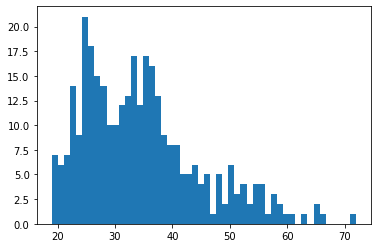

In [ ]:
# plot age at histogram

plt.hist(dnd_sales_df["Age_at_Shoot_Date"], bins=50)
plt.show()

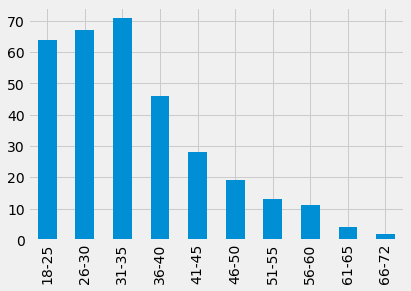

In [ ]:
# lets try bar here
dnd_sales_df["Age_Range"].value_counts(sort=False).plot.bar()


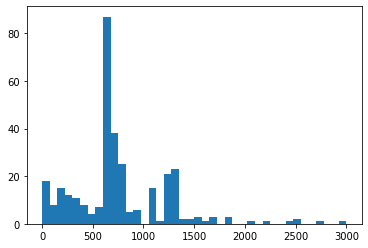

In [ ]:
plt.hist(dnd_sales_df["Sales_total"], bins=40)
plt.show()

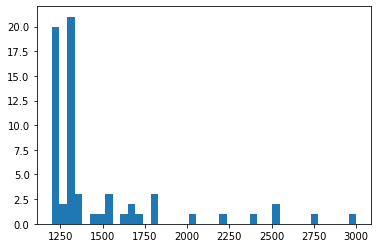

In [ ]:
plt.hist(dnd_highest_codes_df["Sales_total"], bins=40)
plt.show()

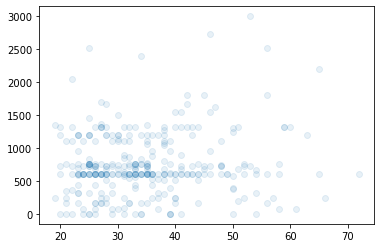

In [ ]:
# This graph improved I might be able to use
# showing: no real correlation between age and sales total
plt.scatter(dnd_sales_df["Age_at_Shoot_Date"],dnd_sales_df["Sales_total"], alpha=.1)
plt.show()

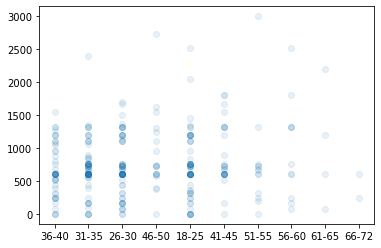

In [ ]:
# This graph is also a maybe, but but I could use a box plot maybe
# showing no real correlation - sample size for the latter age group
plt.scatter(dnd_sales_df["Age_Range"],dnd_sales_df["Sales_total"], alpha=.1)
plt.show()

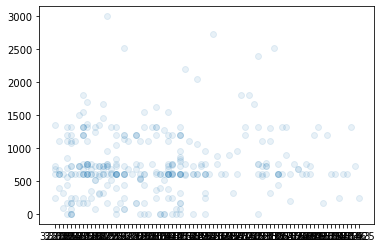

In [ ]:
plt.scatter(dnd_sales_df["zip_code"],dnd_sales_df["Sales_total"], alpha=.1)
plt.show()

# I need to find a better way to show this graph.  I like that it splits the 
# sales data geographically, but the level is granularity is too much

In [ ]:
dnd_highest_codes_df["zip_code"].value_counts()

32258    8
32224    4
32218    4
32225    3
32216    3
32211    3
32223    2
32246    2
32040    2
32097    2
32226    2
32257    2
32256    2
32244    2
32207    2
32405    1
31520    1
31558    1
32312    1
32277    1
31548    1
32063    1
32135    1
32137    1
31522    1
32003    1
32208    1
32095    1
78413    1
33605    1
32250    1
32073    1
32065    1
32217    1
32046    1
32259    1
32011    1
Name: zip_code, dtype: int64

In [ ]:
dnd_highest_codes_df["Hair"].value_counts()

no     45
yes    20
Name: Hair, dtype: int64

In [ ]:
dnd_lowest_codes_df["zip_code"].value_counts()

32246    7
32218    5
32225    4
32226    3
32205    3
32256    3
32034    3
32257    3
32211    2
32073    2
32080    2
32250    2
32065    2
32068    2
32003    2
32086    2
32224    2
32258    2
32244    2
32277    1
31525    1
32207    1
32081    1
32082    1
32137    1
32219    1
32216    1
32206    1
3220?    1
32223    1
32097    1
32092    1
32164    1
32221    1
32043    1
32656    1
32227    1
32208    1
Name: zip_code, dtype: int64

In [ ]:
dnd_lowest_codes_df["Hair"].value_counts()

no     56
yes    16
Name: Hair, dtype: int64

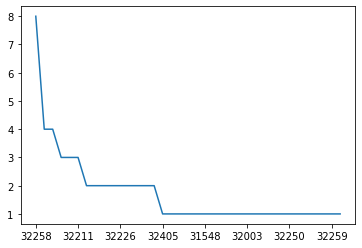

In [ ]:
dnd_highest_codes_df["zip_code"].value_counts().plot()

In [ ]:
# cross tab - I will need to bin /cut the Sales sessions to do an evocative crosstab
# but I can try it now, just to see
# based on this I need to bin the Sales into maybe 5 categories. 
# and bin the zip codes into 2/4/8 categories

cross=pd.crosstab(dnd_sales_df["Sales_total"], dnd_sales_df["Hair"])
cross

Hair,no,yes
Sales_total,,
0,14,4
80,5,2
90,1,0
160,13,1
200,1,0
...,...,...
2200,1,0
2400,0,1
2520,1,1


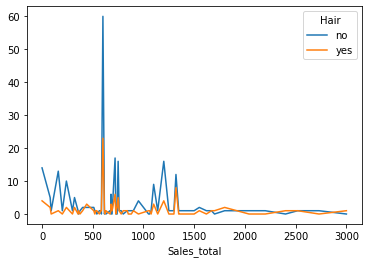

In [ ]:
cross.plot();

In [ ]:
# lets check the sales data for the hair and no hair groups
cond_mu_only = dnd_sales_df["Hair"] == "no"
cond_wHair = dnd_sales_df["Hair"] == "yes"


dnd_makeup_only_df = dnd_sales_df[cond_mu_only]
dnd_w_hair_df = dnd_sales_df[cond_wHair]

In [ ]:
dnd_makeup_only_df.describe() # 

,Session_Fee,Sales_total
count,231.000000,231.000000
mean,92.380952,711.567100
std,42.195223,455.453347
min,0.000000,0.000000
25%,99.000000,515.000000
50%,99.000000,600.000000
75%,99.000000,950.000000
max,249.000000,2730.000000


In [ ]:
dnd_w_hair_df.describe() # this result is very interesting.  it implies clients 
# who get hair done spend and average of $100 more!
# plus we work one hour less! and the morale of the team improves because the 
# stylist gets paid more. 

# perform a t-test with these two sample / or it might be one sample tests
# vs the popuplation.  

,Session_Fee,Sales_total
count,94.000000,94.000000
mean,107.180851,803.287234
std,45.255300,518.220438
min,0.000000,0.000000
25%,99.000000,600.000000
50%,99.000000,679.500000
75%,99.000000,1057.500000
max,249.000000,3000.000000


<function matplotlib.pyplot.show>

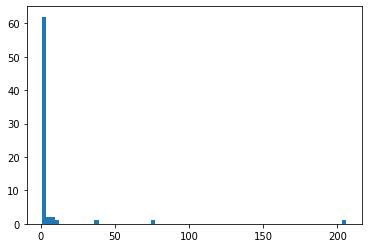

In [ ]:
#lets graph the distribution with a histogram

plt.hist(x=dnd_df["Favorite"].value_counts(), bins=70)
plt.show